In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
city = pd.read_csv('raw_data/city_data.csv')
ride = pd.read_csv('raw_data/ride_data.csv')

In [3]:
##  Average Fare ($) Per City
average_fare = ride.groupby(['city'])['fare'].mean().map('${:.2f}'.format).sort_values()
average_fare.reset_index()[:5]

,city,fare
0,South Latoya,$20.09
1,West Gabriel,$20.35
2,Royland,$20.57
3,Leahton,$21.24
4,Raymondhaven,$21.48


In [4]:
## Total Number of Rides Per City
ride_count = ride.groupby('city')['fare'].count().sort_values(ascending = False)
ride_count.reset_index()[:5]

,city,fare
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Port Frank,33
4,Liumouth,33


In [5]:
## Total Number of Drivers Per City
city.groupby('city')['driver_count']
city.drop('type', 1)[:5]

,city,driver_count
0,Richardfort,38
1,Williamsstad,59
2,Port Angela,67
3,Rodneyfort,34
4,West Robert,39


In [6]:
city_ride_join = pd.merge(city, ride, how='inner', on = 'city')
city_ride_join.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
# grouped cities
cities = city_ride_join.groupby('city')
# average fare by city
average_fare = cities['fare'].mean()
# rides per city
ride_count = cities['type'].count()
# sum of drivers per city
drivers = cities['driver_count'].max()
# city type (Urban, Suburban, Rural)
city_type = cities['type'].max()


In [8]:
#df merge
ride_invs = pd.DataFrame({'average fare': average_fare, '# of rides': ride_count,'drivers': drivers,'city type': city_type})
ride_invs.reset_index().nlargest(10, "drivers")

,city,average fare,# of rides,drivers,city type
116,West Samuelburgh,21.767600,25,73,Urban
96,South Michelleport,24.451613,31,72,Urban
105,West Anthony,24.736667,30,70,Urban
43,Liumouth,26.150000,33,69,Urban
71,Port Angela,23.836842,19,67,Urban
79,Reynoldsfurt,21.919474,19,67,Urban
13,East Kaylahaven,23.757931,29,65,Urban
23,Jerryton,25.649200,25,64,Urban
86,Royland,20.570667,30,64,Urban
18,Grahamburgh,25.221200,25,61,Urban


In [9]:
ride_invs.groupby('city type').mean()

,average fare,# of rides,drivers
city type,,,
Rural,34.637765,6.944444,4.333333
Suburban,30.737298,17.361111,13.611111
Urban,24.499122,24.621212,36.439394


In [10]:
ride_invs.groupby("city type").count()

,average fare,# of rides,drivers
city type,,,
Rural,18,18,18
Suburban,36,36,36
Urban,66,66,66


In [11]:
## bubble plot components
city_sort = ride_invs.groupby("city type")
urban = city_sort.get_group('Urban')
urban_total_rides = urban['# of rides']
urban_average_fare = urban['average fare']
urban_drivers = urban['drivers']

suburban = city_sort.get_group('Suburban')
suburban_total_rides = suburban['# of rides']
suburban_average_fare = suburban['average fare']
suburban_drivers = suburban['drivers']

rural = city_sort.get_group('Rural')
rural_total_rides = rural['# of rides']
rural_average_fare = rural['average fare']
rural_drivers = rural['drivers']


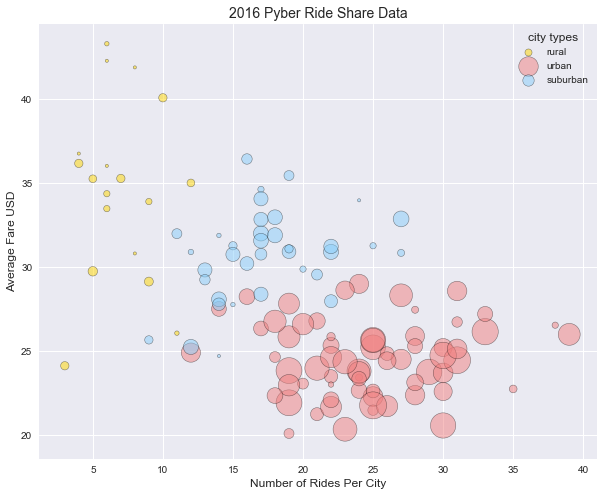

In [12]:
sb.set()
plt.figure(figsize=(10,8))
rural_plot = plt.scatter(rural_total_rides, rural_average_fare, s = rural_drivers*10, 
            c = 'gold', alpha = 0.5, edgecolor='black',linewidths=.5)
urban_plot = plt.scatter(urban_total_rides, urban_average_fare, s = urban_drivers*10, 
            c = 'lightcoral', alpha = 0.5, edgecolor='black',linewidths=.5)
suburban_plot = plt.scatter(suburban_total_rides, suburban_average_fare, s = suburban_drivers*10, 
            c = 'lightskyblue', alpha = 0.5, edgecolor='black',linewidths=.5)


plt.title('2016 Pyber Ride Share Data', fontsize = 14)
plt.xlabel('Number of Rides Per City', fontsize = 12)
plt.ylabel('Average Fare USD', fontsize = 12)
lgnd = plt.legend(('rural','urban','suburban'), loc ='best',title = 'city types')

plt.show()

In [13]:
# % of Total Fares by City Type
fare = city_ride_join.groupby('type')['fare'].sum()
fare_df = pd.DataFrame({'Fare by city': fare})
total_fare = city_ride_join['fare'].sum()
fare_df['percentage'] = ((fare_df/total_fare)*100)
fare_df['Fare by city'] = fare_df['Fare by city']
fare_df.reset_index()

,type,Fare by city,percentage
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


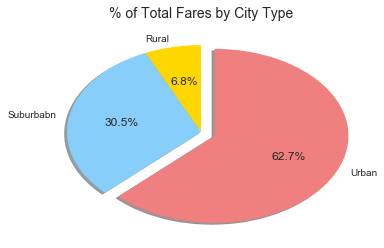

In [14]:
### pie charts

#pie formatting
colors = 'gold', 'lightskyblue', 'lightcoral'
labels = 'Rural', 'Suburbabn', 'Urban'
explode = (0, 0, .11)

# % of Total Fares by City Type
rural_fare_percent = fare_df.iloc[0]['percentage']
suburban_fare_percent = fare_df.iloc[1]['percentage']
urban_fare_percent = fare_df.iloc[2]['percentage']

fares = [rural_fare_percent, suburban_fare_percent, urban_fare_percent]

plt.pie(fares, labels=labels, colors=colors, explode=explode, startangle=450, shadow=True, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type", fontsize=14)
plt.show()

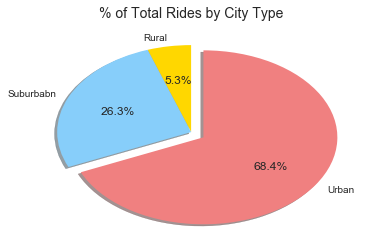

In [15]:
# of Total Rides by City Type
ride = city_ride_join.groupby('type')['ride_id'].count()
ride_df = pd.DataFrame({'Total Rides by city': ride})
total_rides = city_ride_join['ride_id'].count()
ride_df['percentage'] = ((ride_df/total_rides)*100)
ride_df.reset_index()

#fare precent variables
rural_ride_percent = ride_df.iloc[0]['percentage']
suburban_ride_percent = ride_df.iloc[1]['percentage']
urban_ride_percent = ride_df.iloc[2]['percentage']

rides = [rural_ride_percent, suburban_ride_percent, urban_ride_percent]

plt.pie(rides, labels=labels, colors=colors, explode=explode, startangle=90, shadow=True, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type", fontsize=14)
plt.show()

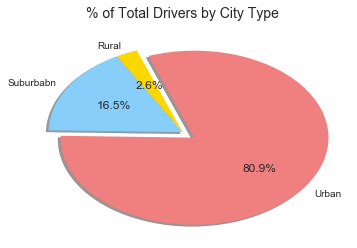

In [16]:
# % of Total Drivers by City Type
drivers = ride_invs.groupby("city type")['drivers'].sum()
drivers_df = pd.DataFrame({'Total Drivers by city': drivers})
total_drivers = ride_invs['drivers'].sum()
drivers_df['percentage'] = ((drivers_df/total_drivers)*100)
drivers_df.reset_index()

#fare precent variables
rural_driver_percent = drivers_df.iloc[0]['percentage']
suburban_driver_percent = drivers_df.iloc[1]['percentage']
urban_driver_percent = drivers_df.iloc[2]['percentage']

drivers = [rural_driver_percent, suburban_driver_percent, urban_driver_percent]

plt.pie(drivers, labels=labels, colors=colors, explode=explode, startangle=110, shadow=True, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type", fontsize=14)
plt.show()

In [17]:
## observations
    # 1. Pyber is most common in Urban areas as there are the most number of drivers and most number of requested rides there.
    # 2. Rural areas averaged higher fares, longer travel distances seem a relevant component of that.
    # 3. Number of rides and fares have an inverse relationship.